In [804]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

from src.spike_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1009]:
np.random.seed(6)
NUM_SAMPLES = 10000
NUM_SPIKES = 3

In [1010]:
spikes = n_uniform_spikes(NUM_SPIKES)
isi_arr = spikes[1:] - spikes[:-1]
spikes

array([0.33197981, 0.82122912, 0.89286015])

In [1011]:
fourier_vals, frequencies = compute_fourier_freq_profile(spikes, num_samples=NUM_SAMPLES)
magnitudes_freqs = abs(fourier_vals)

(0.0, 20.4394766370913)

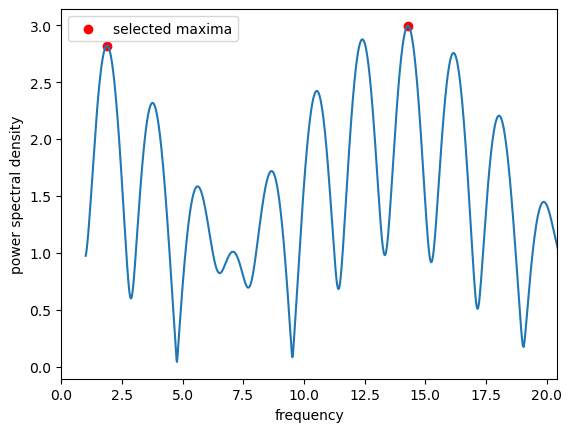

In [1012]:
# fourier components
plt.plot(frequencies, magnitudes_freqs)
plt.xlabel('frequency')
plt.ylabel('power spectral density')


# maxima
peak_freqs, peak_indices = peak_freq_components(spikes, magnitudes_freqs,
                                                frequencies, limited_indices=[0,2],
                                                eps=0.5)
plt.scatter(peak_freqs, magnitudes_freqs[peak_indices], label='selected maxima', color='red')

plt.legend()
plt.xlim(0, min(1/isi_arr[0] * 10, NUM_SAMPLES))

In [1013]:
time = np.linspace(0, 1, NUM_SAMPLES)
spike_signal = compute_spike_signal(spikes, NUM_SAMPLES)
frequencies_to_plot = peak_freqs[:len(spikes)-1]

wave_signal_sum = np.zeros(NUM_SAMPLES)

for idx, freq in enumerate(frequencies_to_plot):
    wave_signal = compute_wave(freq, spikes, NUM_SAMPLES)
    wave_signal_sum += wave_signal * abs(spike_fourier(spikes, freq))

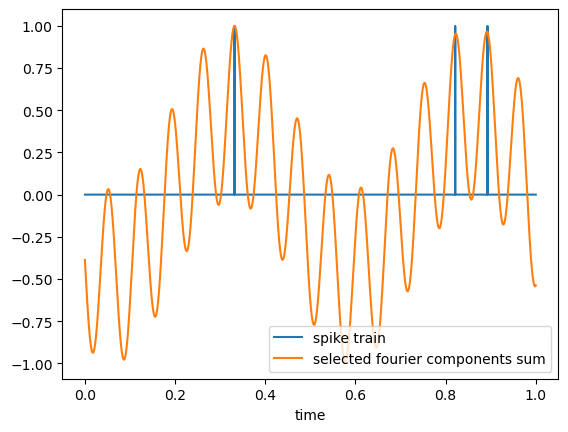

In [1014]:
plt.plot(time, spike_signal, label='spike train')
plt.plot(time, wave_signal_sum / max(wave_signal_sum), label=f'selected fourier components sum')
plt.xlabel('time')
plt.legend()

/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_12746/3588531837.py:63: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


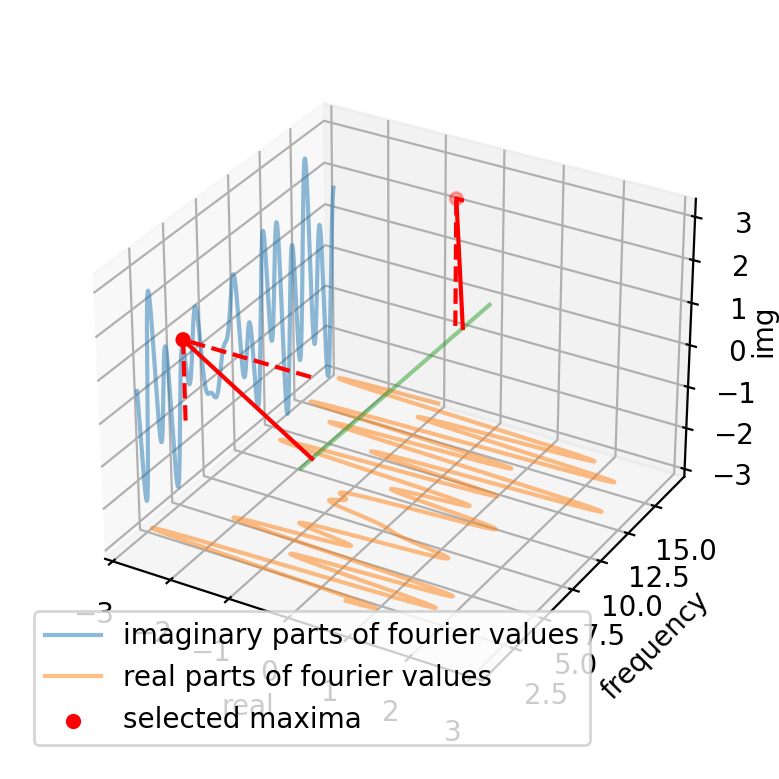

In [1015]:
ax = plt.figure(dpi=200).add_subplot(projection='3d')

# Prepare arrays x, y, z

plot_indices = range(9400)

"""ax.plot(fourier_vals.real[plot_indices],
        frequencies[plot_indices],
        fourier_vals.imag[plot_indices], 
        label='fourier values')"""

# imaginary values plot
ax.plot([min(fourier_vals.real[plot_indices])] * len(plot_indices),
        frequencies[plot_indices],
        fourier_vals.imag[plot_indices], 
        label='imaginary parts of fourier values',
        alpha=0.5)

# real values plot
ax.plot(fourier_vals.real[plot_indices],
        frequencies[plot_indices],
        [min(fourier_vals.imag[plot_indices])] * len(plot_indices), 
        label='real parts of fourier values',
        alpha=0.5)



# dots at peaks in fourier space
ax.scatter(fourier_vals[peak_indices].real,
           frequencies[peak_indices],
           fourier_vals[peak_indices].imag,
           label='selected maxima', color='red')

# line of (0,0) complex value, through frequencies
ax.plot([0, 0],
        frequencies[[plot_indices[0], plot_indices[-1]]],
        [0, 0], 
        alpha=0.5)

for peak_idx in peak_indices:
    
    # dashed support lines
    ax.plot([0, fourier_vals[peak_idx].real],
            [frequencies[peak_idx], frequencies[peak_idx]],
            [fourier_vals[peak_idx].imag, fourier_vals[peak_idx].imag], color='red',
            linestyle='--')
    ax.plot([fourier_vals[peak_idx].real, fourier_vals[peak_idx].real],
            [frequencies[peak_idx], frequencies[peak_idx]],
            [0, fourier_vals[peak_idx].imag], color='red',
            linestyle='--')
    
    # solid line pointing to chosen peak
    ax.plot([0, fourier_vals[peak_idx].real],
            [frequencies[peak_idx], frequencies[peak_idx]],
            [0, fourier_vals[peak_idx].imag], color='red',
            linestyle='-')

ax.legend()

ax.set_xlabel('real')
ax.set_ylabel('frequency')
ax.zaxis.labelpad=-3
ax.dist = 11
ax.set_zlabel('img', linespacing=3.4, rotation=90)
#ax.view_init(20, 60)

plt.show()